In [1]:
from train_models import train_pgbm_dengue, apply_dengue_pgbm_on_chik, train_pgbm_chik
from train_models import train_dengue_model, train_chik_model, transf_and_pred_chik, apply_dl_dengue_on_chik

2023-11-20 09:50:27.091542: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-20 09:50:27.110826: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 09:50:27.110844: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 09:50:27.111474: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 09:50:27.115019: I tensorflow/core/platform/cpu_feature_guar

In [2]:
city = 2913606
state = 'BA'
INI_DATE = '2014-10-01'
END_DATE_TRAIN = '2022-11-01'
END_DATE = '2023-11-01'

### Train the dengue DL model:

In [3]:
%%time 
train_dengue_model(city,  end_date_train = END_DATE_TRAIN , end_date = END_DATE)
    

FileNotFoundError: [Errno 2] No such file or directory: '../data/dengue_2913606_cluster.csv'

### Apply this dengue DL model on chik data: 

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

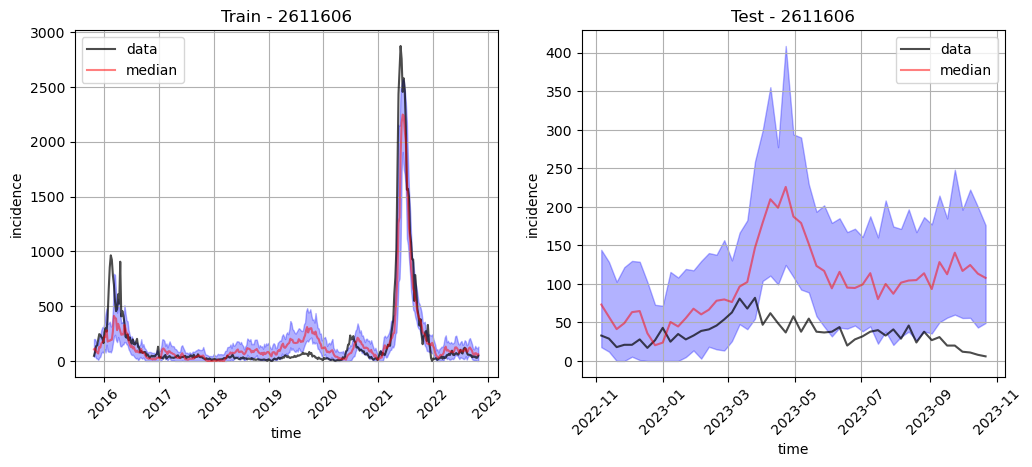

CPU times: user 9min 31s, sys: 6.96 s, total: 9min 38s
Wall time: 9min 28s


In [4]:
%%time
apply_dl_dengue_on_chik(city, ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)

## Apply the transfer: 

Compilation Time :  0.0018222332000732422
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 52, 376)]         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 52, 64)           225792    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 52, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                   

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

366/366 [==============================] - 27s 69ms/step - loss: 0.0206 - accuracy: 0.5027 - mape: 2111843.2500 - mse: 0.0069
Epoch 2/250
366/366 [==============================] - 26s 71ms/step - loss: 0.0171 - accuracy: 0.4973 - mape: 593883.4375 - mse: 0.0019
Epoch 3/250
366/366 [==============================] - 26s 72ms/step - loss: 0.0167 - accuracy: 0.5137 - mape: 742833.2500 - mse: 0.0022
Epoch 4/250
366/366 [==============================] - 26s 72ms/step - loss: 0.0162 - accuracy: 0.5191 - mape: 1199837.5000 - mse: 0.0026
Epoch 5/250
366/366 [==============================] - 26s 72ms/step - loss: 0.0159 - accuracy: 0.4945 - mape: 956849.2500 - mse: 0.0030
Epoch 6/250
366/366 [==============================] - 26s 71ms/step - loss: 0.0158 - accuracy: 0.5137 - mape: 1162262.0000 - mse: 0.0038
Epoch 7/250
366/366 [==============================] - 26s 71ms/step - loss: 0.0147 - accuracy: 0.5137 - mape: 879522.6250 - mse: 0.0025
Epoch 8/250
366/366 [=============================

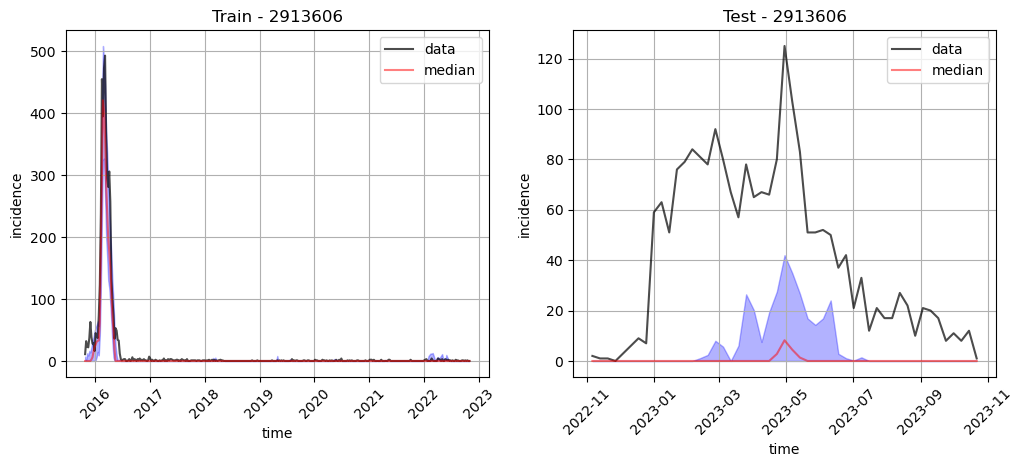

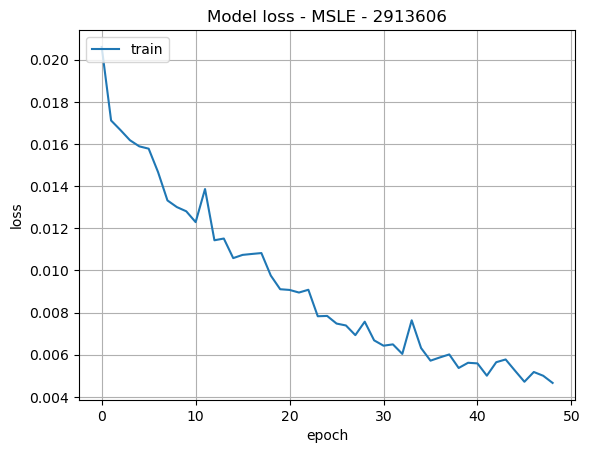

CPU times: user 41min 16s, sys: 6min 6s, total: 47min 22s
Wall time: 43min 34s


In [7]:
%%time 

transf_and_pred_chik(city, ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)

### Train the dengue pgbm model 

Training on CPU
Training on CPU
Training on CPU
Training on CPU


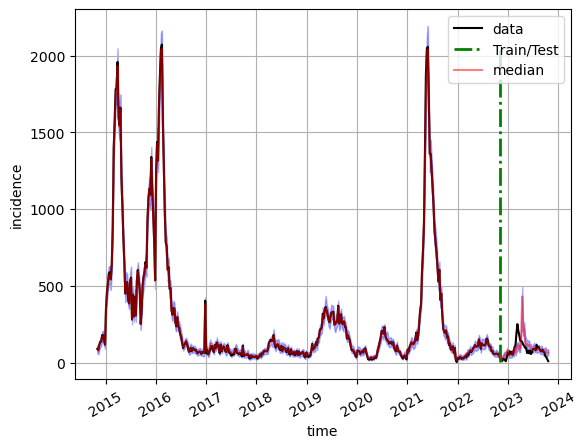

CPU times: user 1h 3min 51s, sys: 1h 17min 39s, total: 2h 21min 30s
Wall time: 41min 20s


In [6]:
%%time
train_pgbm_dengue(city, state, ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)



### Apply the dengue pgbm model on chik:

(471,)
(470,)
(469,)
(468,)


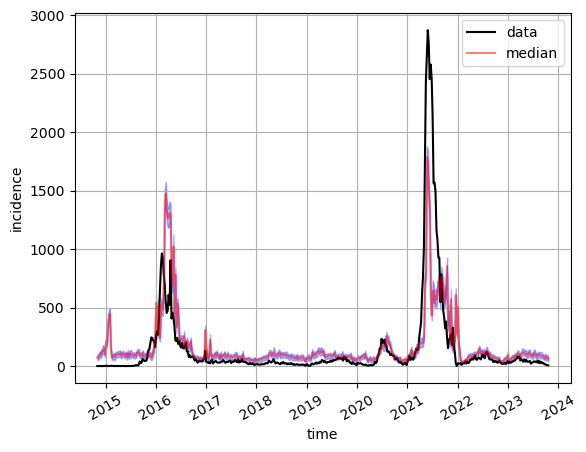

CPU times: user 12.7 s, sys: 2.13 s, total: 14.8 s
Wall time: 4.46 s


In [7]:
%%time
apply_dengue_pgbm_on_chik(city, state, ini_date=INI_DATE, end_date= END_DATE)



### Train the chik DL model:

Compilation Time :  0.00249481201171875
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 52, 121)]         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 52, 64)           95232     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 52, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                   

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

69/69 [==============================] - 9s 79ms/step - loss: 0.0816 - accuracy: 0.2190 - mape: 434.2511 - mse: 0.0252 - val_loss: 0.0756 - val_accuracy: 0.2174 - val_mape: 477.2024 - val_mse: 0.0183
Epoch 2/250
69/69 [==============================] - 5s 80ms/step - loss: 0.0766 - accuracy: 0.2190 - mape: 563.7075 - mse: 0.0236 - val_loss: 0.0718 - val_accuracy: 0.2500 - val_mape: 565.6093 - val_mse: 0.0178
Epoch 3/250
69/69 [==============================] - 6s 83ms/step - loss: 0.0714 - accuracy: 0.2518 - mape: 510.1461 - mse: 0.0211 - val_loss: 0.0651 - val_accuracy: 0.1739 - val_mape: 277.3932 - val_mse: 0.0131
Epoch 4/250
69/69 [==============================] - 6s 84ms/step - loss: 0.0654 - accuracy: 0.2555 - mape: 208.6062 - mse: 0.0159 - val_loss: 0.0615 - val_accuracy: 0.1848 - val_mape: 546.5595 - val_mse: 0.0101
Epoch 5/250
69/69 [==============================] - 6s 83ms/step - loss: 0.0603 - accuracy: 0.2372 - mape: 252.9469 - mse: 0.0115 - val_loss: 0.0561 - val_accuracy

Epoch 40/250
69/69 [==============================] - 6s 84ms/step - loss: 0.0231 - accuracy: 0.3394 - mape: 136.3198 - mse: 0.0026 - val_loss: 0.0224 - val_accuracy: 0.2717 - val_mape: 166.2436 - val_mse: 0.0016
Epoch 41/250
69/69 [==============================] - 6s 84ms/step - loss: 0.0225 - accuracy: 0.3321 - mape: 124.2243 - mse: 0.0024 - val_loss: 0.0224 - val_accuracy: 0.3370 - val_mape: 168.4433 - val_mse: 0.0026
Epoch 42/250
69/69 [==============================] - 6s 84ms/step - loss: 0.0222 - accuracy: 0.3394 - mape: 116.9442 - mse: 0.0024 - val_loss: 0.0215 - val_accuracy: 0.2826 - val_mape: 141.7077 - val_mse: 0.0012
Epoch 43/250
69/69 [==============================] - 6s 84ms/step - loss: 0.0221 - accuracy: 0.3102 - mape: 156.0638 - mse: 0.0031 - val_loss: 0.0212 - val_accuracy: 0.3152 - val_mape: 171.7809 - val_mse: 0.0013
Epoch 44/250
69/69 [==============================] - 6s 84ms/step - loss: 0.0217 - accuracy: 0.3358 - mape: 163.5482 - mse: 0.0026 - val_loss: 0.02

69/69 [==============================] - 6s 83ms/step - loss: 0.0133 - accuracy: 0.3686 - mape: 103.5842 - mse: 0.0016 - val_loss: 0.0129 - val_accuracy: 0.3587 - val_mape: 167.3271 - val_mse: 7.9227e-04
Epoch 79/250
69/69 [==============================] - 6s 86ms/step - loss: 0.0132 - accuracy: 0.3248 - mape: 123.1041 - mse: 0.0015 - val_loss: 0.0130 - val_accuracy: 0.3913 - val_mape: 89.7038 - val_mse: 0.0017
Epoch 80/250
69/69 [==============================] - 6s 85ms/step - loss: 0.0133 - accuracy: 0.3139 - mape: 119.0913 - mse: 0.0022 - val_loss: 0.0128 - val_accuracy: 0.3370 - val_mape: 208.1705 - val_mse: 0.0011
Epoch 81/250
69/69 [==============================] - 6s 84ms/step - loss: 0.0133 - accuracy: 0.3175 - mape: 102.0821 - mse: 0.0026 - val_loss: 0.0128 - val_accuracy: 0.3043 - val_mape: 150.2727 - val_mse: 0.0013
Epoch 82/250
69/69 [==============================] - 6s 86ms/step - loss: 0.0129 - accuracy: 0.3139 - mape: 134.5749 - mse: 0.0018 - val_loss: 0.0125 - val_a

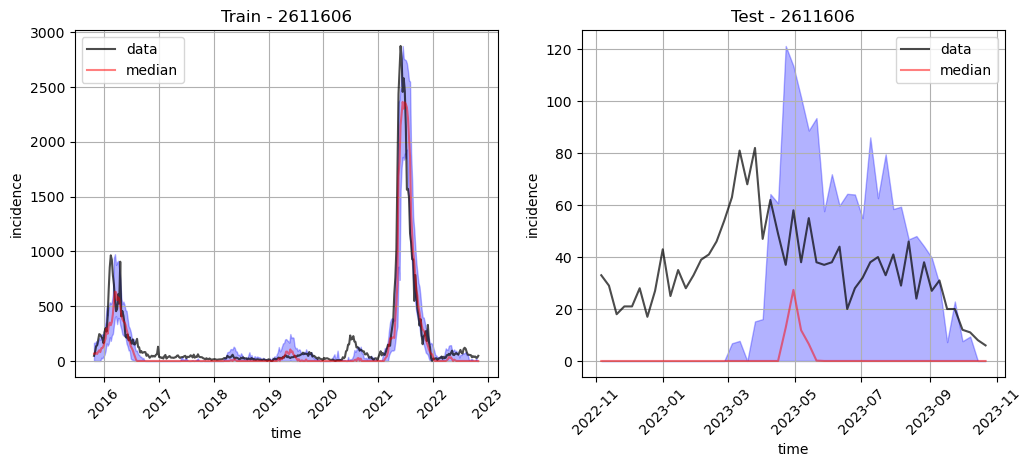

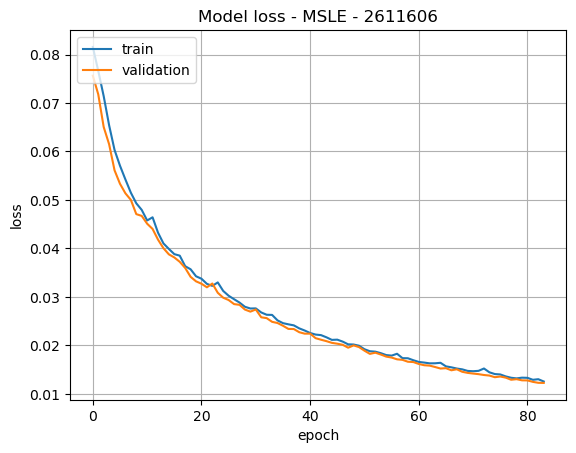

CPU times: user 13min 48s, sys: 25.8 s, total: 14min 14s
Wall time: 13min 58s


In [4]:
%%time 

train_chik_model(city, ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)

### Train the chik PGBM model:

Training on CPU
Training on CPU
Training on CPU
Training on CPU


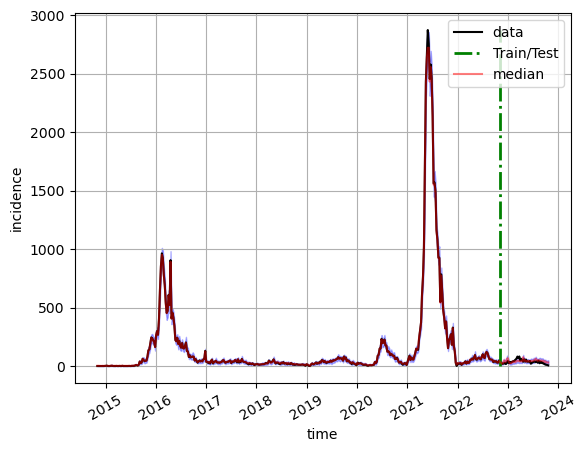

CPU times: user 1h 20min 31s, sys: 1h 41min 57s, total: 3h 2min 29s
Wall time: 53min 24s


In [3]:
%%time
train_pgbm_chik(city, state, ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)
